<a href="https://colab.research.google.com/github/Dannyhamtar/MachineLearning/blob/main/Task%20week%207/XGBoost_Danny_Hamtar_Pangestu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Danny Hamtar Pangestu**

**Nim: 1103210037**

**Lecture 7 : XGB**

**Dataset : [melb_data.csv](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download)**



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('/content/sample_data/melb_data.csv')

In [14]:
# Feature engineering
data = data.dropna(axis=0)  # Drop missing values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

In [16]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [17]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
12212,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,3.0,2.0,1087.0,388.50,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0


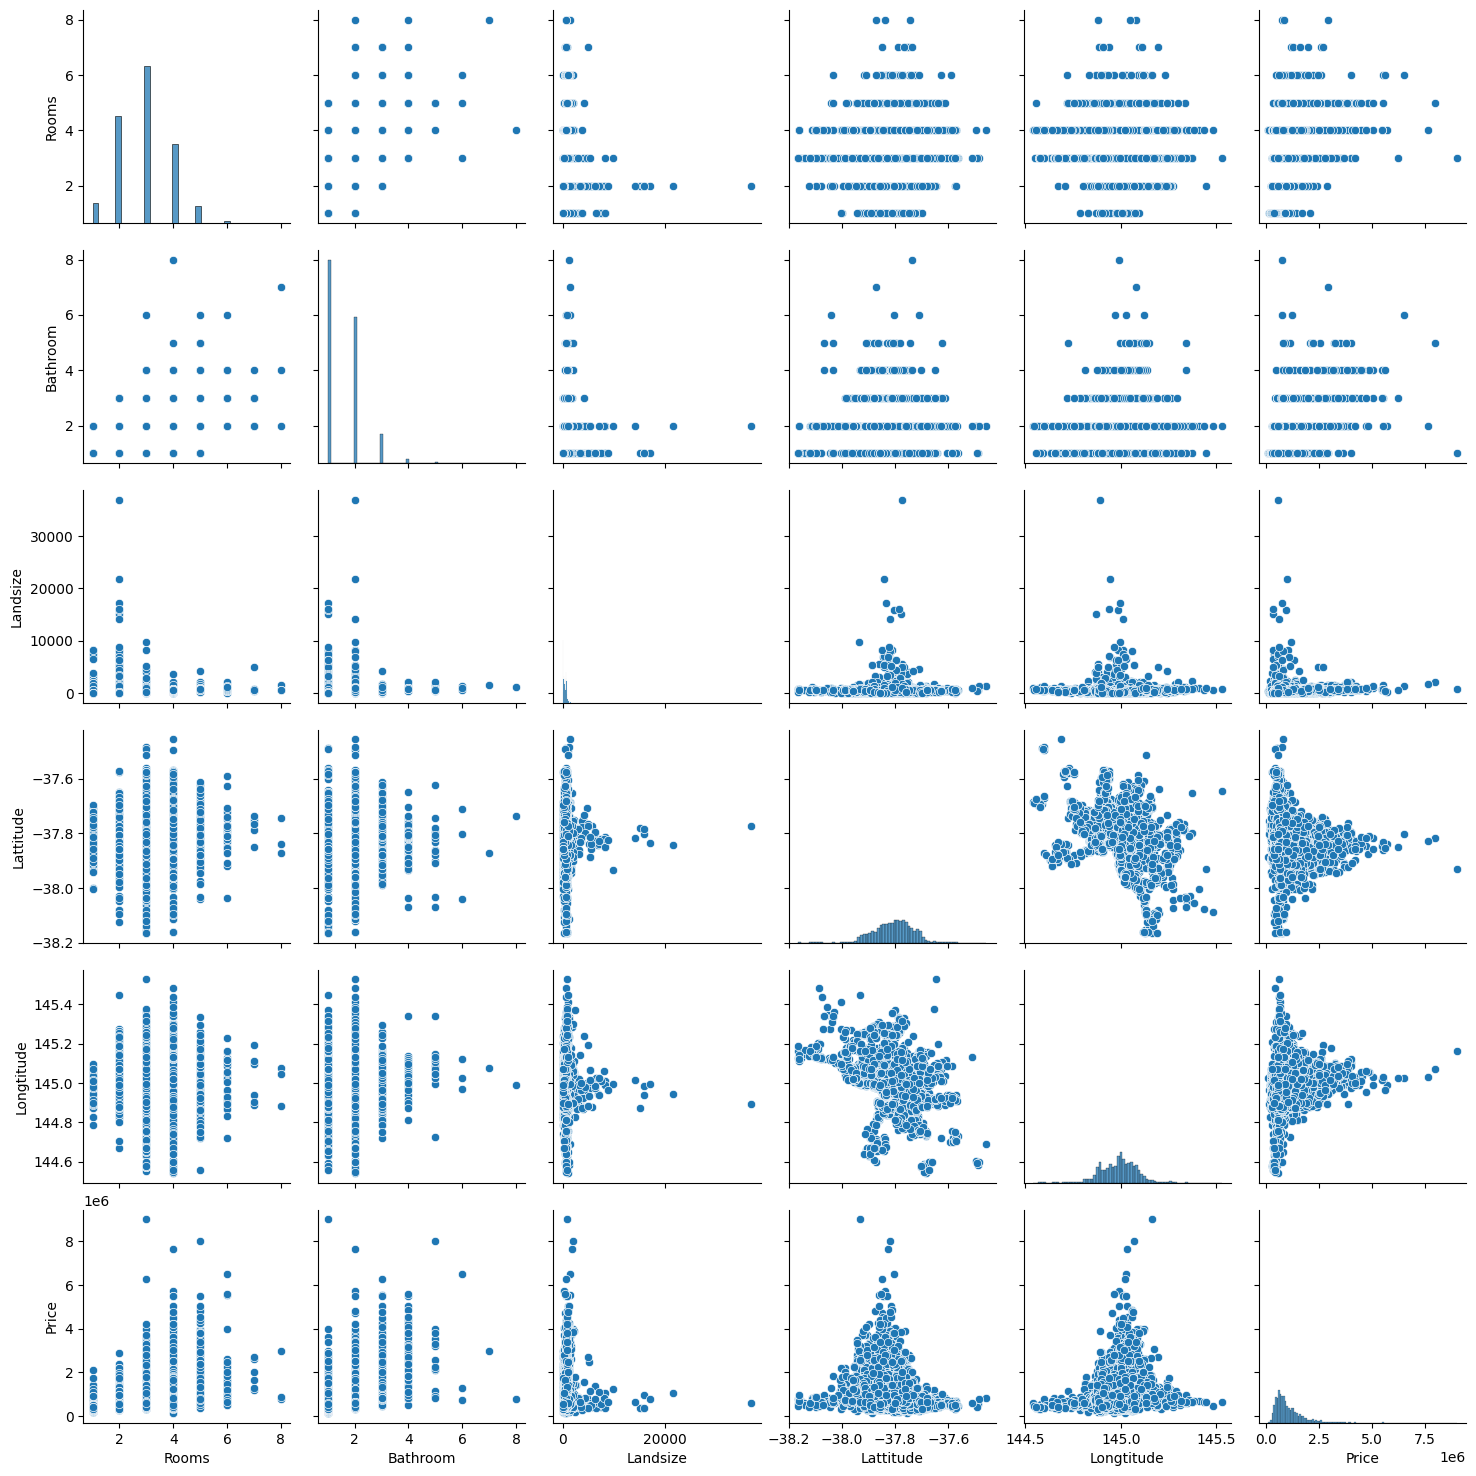

In [18]:
# Visualize data
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
sns.pairplot(data[features + ['Price']])
plt.show()

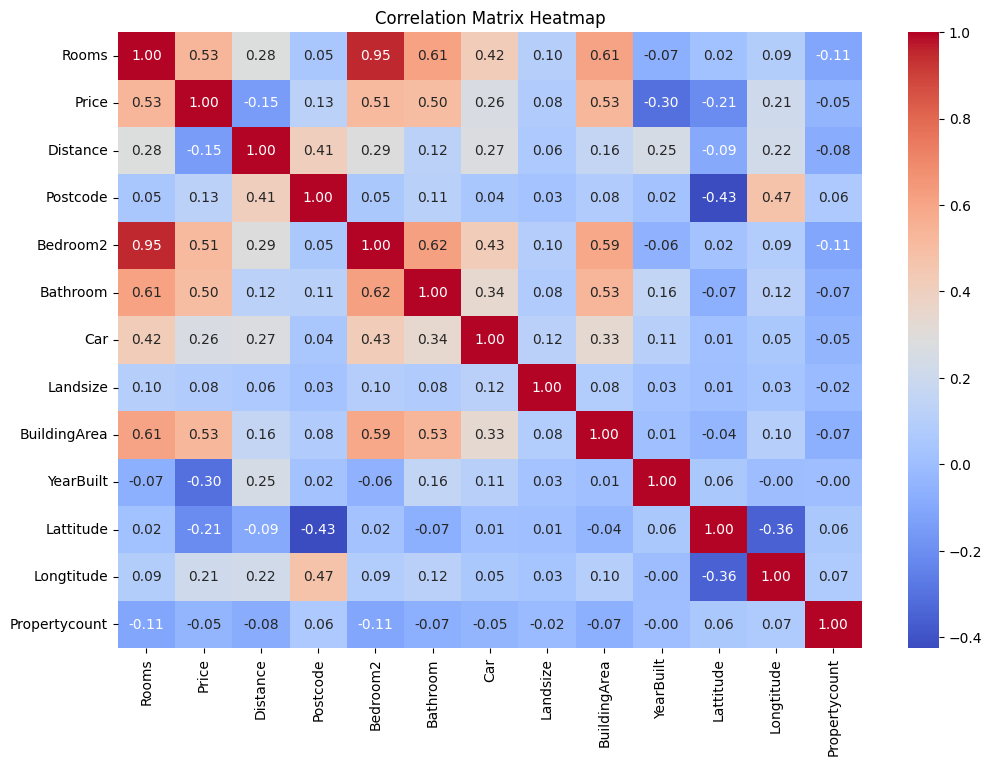

In [20]:
# Select numeric columns for correlation matrix
numeric_cols = data.select_dtypes(include=['number']).columns
corr_matrix = data[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train models
models = {
    'Random Forest': RandomForestRegressor(random_state=0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'XGBoost': XGBRegressor(random_state=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{name} MAE: {mae}')

Random Forest MAE: 207900.1343103051
Decision Tree MAE: 282433.19867312175
XGBoost MAE: 210763.841442812
